# 이미지 데이터 셋을 이용한 CNN Modeling


> Google Drive Mount
Dogs and Cats Image_Data
- Train_Data : 2000(1000_Dogs, 1000_Cats)
- Valid_Data : 1000(500_Dogs, 500_Cats)
- Test_Data : 1000(500_Dogs, 500_Cats)



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [3]:
print('GPU Information-', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information- /device:GPU:0 

Fri Aug  6 06:09:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                       

**l.Google Drive Mount**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Aug  4 07:29 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


**ll.Data Preprocessing**

In [7]:
# Unzip 'dogs_and cats_small.zip'

!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [8]:
!ls -l

total 20
drwx------ 5 root root 4096 Aug  6 06:11 drive
drwxr-xr-x 1 root root 4096 Jul 16 13:20 sample_data
drwxr-xr-x 4 root root 4096 Aug  6 06:14 test
drwxr-xr-x 4 root root 4096 Aug  6 06:14 train
drwxr-xr-x 4 root root 4096 Aug  6 06:14 validation


In [9]:
# Image_File Directory Setting

train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [10]:
# ImageDataGenerator() & flow_from_directory()

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# Test train_generator

for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


**lll.CNN Keras Modeling**

In [14]:
# Model Define
# Feature Extraction & Classification

from tensorflow.keras import layers 
from tensorflow.keras import models 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
# Model Compile
# 모델 학습방법 설정

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [19]:
# Model Fit
# 모델 학습 수행

%%time
Hist_dandc = model.fit(train_generator, steps_per_epoch = 100,
                       epochs = 60, validation_data = valid_generator, validation_steps = 50
                      )

Epoch 1/60
100/100 [==============================] - 41s 92ms/step - loss: 0.6968 - accuracy: 0.4790 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 9s 87ms/step - loss: 0.6934 - accuracy: 0.5175 - val_loss: 0.6917 - val_accuracy: 0.5140
Epoch 3/60
100/100 [==============================] - 9s 86ms/step - loss: 0.6931 - accuracy: 0.5270 - val_loss: 0.6875 - val_accuracy: 0.4990
Epoch 4/60
100/100 [==============================] - 8s 85ms/step - loss: 0.6882 - accuracy: 0.5195 - val_loss: 0.6819 - val_accuracy: 0.5010
Epoch 5/60
100/100 [==============================] - 8s 85ms/step - loss: 0.6903 - accuracy: 0.5360 - val_loss: 0.6843 - val_accuracy: 0.5370
Epoch 6/60
100/100 [==============================] - 9s 87ms/step - loss: 0.6757 - accuracy: 0.5520 - val_loss: 0.7122 - val_accuracy: 0.5210
Epoch 7/60
100/100 [==============================] - 9s 92ms/step - loss: 0.6638 - accuracy: 0.5855 - val_loss: 0.6454 - val_accuracy: 0.613

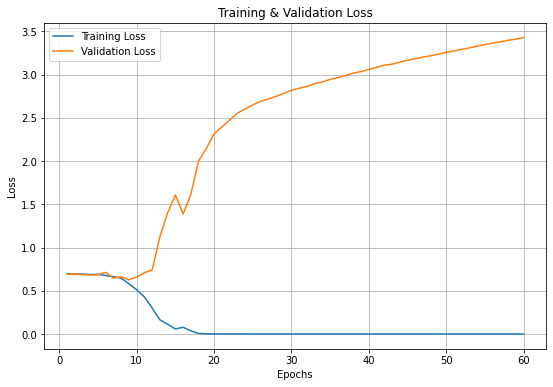

In [22]:
# 학습 결과 시각화
# Loss Visualization

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)
plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

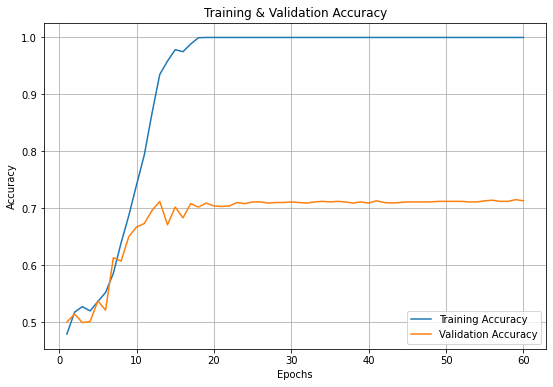

In [24]:
# 학습 결과 시각화
# Accuracy Visualization

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [25]:
# Model Evaluate
# test_generator

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [26]:
# Loss & Accuracy

loss, accuracy = model.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 59ms/step - loss: 3.2004 - accuracy: 0.6980
Loss = 3.20037
Accuracy = 0.69800


**lV.Model Svae & Load to Google Drive**

In [27]:
# Google Drive Mount

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Model Save

model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [29]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40527
-rw------- 1 root root 41498696 Aug  6 06:43 002_dogs_and_cats_small.h5


In [30]:
# Model Load

from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [31]:
loss, accuracy = model_small.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 59ms/step - loss: 3.2004 - accuracy: 0.6980
Loss = 3.20037
Accuracy = 0.69800
